## Group 13 Final Project

## Introduction

**Before moving to a new area, its good to know how safe that place is before settling down. But safety is a concern about many different categories, so its important that we took information from different aspects to help give a well rounded estimate as to where the safest neighborhood is. For our project, we went ahead and looked at 3 different safety metrics to determine which neighborhood in Pittsburgh to determine which is the safest. So, lets find out, who has the safest neighborhood!**

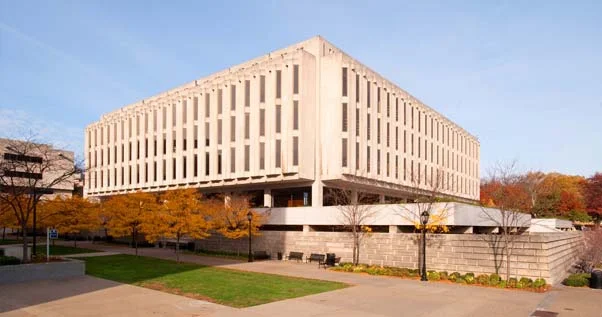

## Metrics

**As said, we used three different metrics to determine the safety of each neighborhood.**

## Part 1: Fires in the City

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("fire_incident_data.csv")
df.head(10)

,call_no,incident_type,type_description,address,alarm_time,alarms,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,F160029985,111.0,Building fire,"800 BLOCK CENTER ST, WILKINSBURG PA 15221",2016-04-21T05:01:04,1,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-16,40.441275,-79.882485
1,F180022058,111.0,Building fire,"1100 BLOCK JANE ST, WILKINSBURG PA 15221",2018-03-13T08:34:43,1,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-21,40.436342,-79.881003
2,F180022102,131.0,Passenger vehicle fire,"SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212",2018-03-13T11:54:23,0,231EN32,2406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1A,NaN,NaN
3,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",2017-05-31T08:39:47,0,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
4,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",2018-03-09T10:26:42,1,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.449009,-80.076607
5,F180021782,150.0,"Outside rubbish fire, Other","S 7TH ST & E CARSON ST, PITTSBURGH PA 15203",2018-03-12T09:13:28,0,231EN24,1702.0,South Side Flats,3.0,17.0,4.200317e+10,4.0,17.0,3.0,4-2,40.428618,-79.992239
6,F180022495,113.0,"Cooking fire, confined to container","200 BLOCK E OHIO ST, PITTSBURGH PA 15212",2018-03-14T19:46:10,1,231EN32,2204.0,Allegheny Center,1.0,22.0,4.200356e+10,1.0,22.0,1.0,1-6,40.453022,-80.003660
7,F180022546,111.0,Building fire,"7000 BLOCK LEMINGTON AVE, PITTSBURGH PA 15206",2018-03-14T23:49:22,1,231EN15,1203.0,Lincoln-Lemington-Belmar,9.0,12.0,4.200312e+10,2.0,12.0,5.0,3-18,40.471358,-79.898240
8,F180022773,111.0,Building fire,"100 BLOCK SPENCER AVE, PITTSBURGH PA 15227",2018-03-15T20:39:05,1,231EN23,2904.0,Carrick,4.0,29.0,4.200329e+10,4.0,29.0,3.0,4-15,40.385494,-79.977200
9,F170044316,131.0,Passenger vehicle fire,"1200 BLOCK WESTFIELD ST, PITTSBURGH PA 15216",2017-06-03T01:31:13,0,231EN28,1916.0,Beechview,4.0,19.0,4.200319e+10,5.0,19.0,6.0,4-28,40.415219,-80.019516


In [4]:
df['neighborhood'].value_counts()

Carrick                      280
Central Business District    255
South Side Flats             250
Squirrel Hill South          247
Hazelwood                    238
                            ... 
St. Clair                     11
East Carnegie                 11
Mt. Oliver                    11
Regent Square                  9
Mount Oliver Borough           6
Name: neighborhood, Length: 91, dtype: int64

In [4]:
df['alarms'].value_counts()

1     4685
0     4128
2      188
3       98
4       29
5       10
6        1
7        1
19       1
Name: alarms, dtype: int64

In [5]:
alarm_mask = df['alarms'] < 6
norm_alarms = df[alarm_mask]
norm_alarms.head(10)

,call_no,incident_type,type_description,address,alarm_time,alarms,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,F160029985,111.0,Building fire,"800 BLOCK CENTER ST, WILKINSBURG PA 15221",2016-04-21T05:01:04,1,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-16,40.441275,-79.882485
1,F180022058,111.0,Building fire,"1100 BLOCK JANE ST, WILKINSBURG PA 15221",2018-03-13T08:34:43,1,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-21,40.436342,-79.881003
2,F180022102,131.0,Passenger vehicle fire,"SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212",2018-03-13T11:54:23,0,231EN32,2406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1A,NaN,NaN
3,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",2017-05-31T08:39:47,0,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
4,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",2018-03-09T10:26:42,1,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.449009,-80.076607
5,F180021782,150.0,"Outside rubbish fire, Other","S 7TH ST & E CARSON ST, PITTSBURGH PA 15203",2018-03-12T09:13:28,0,231EN24,1702.0,South Side Flats,3.0,17.0,4.200317e+10,4.0,17.0,3.0,4-2,40.428618,-79.992239
6,F180022495,113.0,"Cooking fire, confined to container","200 BLOCK E OHIO ST, PITTSBURGH PA 15212",2018-03-14T19:46:10,1,231EN32,2204.0,Allegheny Center,1.0,22.0,4.200356e+10,1.0,22.0,1.0,1-6,40.453022,-80.003660
7,F180022546,111.0,Building fire,"7000 BLOCK LEMINGTON AVE, PITTSBURGH PA 15206",2018-03-14T23:49:22,1,231EN15,1203.0,Lincoln-Lemington-Belmar,9.0,12.0,4.200312e+10,2.0,12.0,5.0,3-18,40.471358,-79.898240
8,F180022773,111.0,Building fire,"100 BLOCK SPENCER AVE, PITTSBURGH PA 15227",2018-03-15T20:39:05,1,231EN23,2904.0,Carrick,4.0,29.0,4.200329e+10,4.0,29.0,3.0,4-15,40.385494,-79.977200
9,F170044316,131.0,Passenger vehicle fire,"1200 BLOCK WESTFIELD ST, PITTSBURGH PA 15216",2017-06-03T01:31:13,0,231EN28,1916.0,Beechview,4.0,19.0,4.200319e+10,5.0,19.0,6.0,4-28,40.415219,-80.019516


In [6]:
norm_alarms['alarms'].value_counts()

1    4685
0    4128
2     188
3      98
4      29
5      10
Name: alarms, dtype: int64

In [7]:
df_grouped = norm_alarms.groupby(by = 'neighborhood')['alarms'].sum()
df_lowest_sorted = df_grouped.sort_values(ascending = True)
df_lowest_sorted.head(10)

neighborhood
Ridgemont               1
Mount Oliver Borough    2
New Homestead           2
St. Clair               4
Regent Square           4
Hays                    5
Bon Air                 5
Chartiers City          6
South Shore             6
Mt. Oliver              6
Name: alarms, dtype: int64

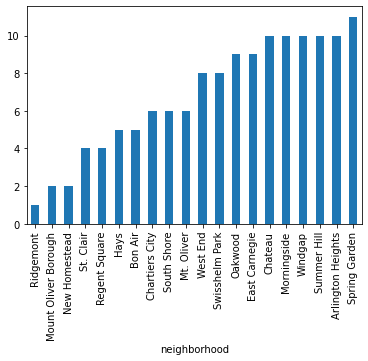

In [8]:
df_lowest_sorted.iloc[:20].plot(kind = "bar")

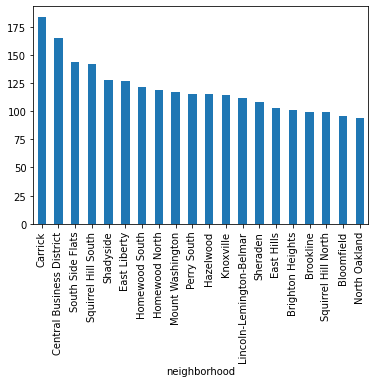

In [9]:
df_highest_sorted = df_grouped.sort_values(ascending = False)
df_highest_sorted.iloc[:20].plot(kind = "bar")

In [10]:
df_ranked = df_lowest_sorted.rank()
print(df_ranked)

neighborhood
Ridgemont                     1.0
Mount Oliver Borough          2.5
New Homestead                 2.5
St. Clair                     4.5
Regent Square                 4.5
                             ... 
Shadyside                    87.0
Squirrel Hill South          88.0
South Side Flats             89.0
Central Business District    90.0
Carrick                      91.0
Name: alarms, Length: 91, dtype: float64


## Part 2: EMS Call

* **Data Set**
* **Any issues?**
    * **Bias?**
* **What we'll be seeing**

**First 10 EMS Calls**

In [3]:
info = pd.read_csv("EMSdata.csv")
info.head(10)

,_id,call_id_hash,service,priority,priority_desc,call_quarter,call_year,description_short,city_code,city_name,geoid,census_block_group_center__x,census_block_group_center__y
0,278,0000971292DCDD81F23EEBB990BD84,EMS,E0,EMS Advanced Life Support life threatening res...,Q4,2018.0,"GUNSHOT, STABBING, OR OTHER WOUND",PGH,PITTSBURGH,4.200313e+14,-79.886054,40.453670
1,1553708,00010B28D021001012C6CD9C2ADABA,EMS,E5,All administrative mark outs,Q4,2022.0,NON EMERGENCY TRANSPORT,PGH,PITTSBURGH,4.200304e+14,-79.962061,40.440680
2,1339443,00014D43706B01B7A1F586675953C7,EMS,E5,All administrative mark outs,Q4,2021.0,NON EMERGENCY TRANSPORT,MTL,MOUNT LEBANON,4.200347e+14,-80.066971,40.378616
3,120,00015B641BBD12B12E22C333848889,EMS,E2,EMS Standard Advanced Life Support response,Q4,2015.0,TRAUMA,PIN,PINE,4.200341e+14,-80.028501,40.670599
4,1180412,0001B41774713343972635B566EAD1,EMS,E4,EMS Basic Life Support Assistance response (i....,Q1,2021.0,Removed,SHA,SHALER,4.200343e+14,-79.983126,40.532740
5,596,0001CA6C21448FEF6C3E7F82BC534F,EMS,E1,EMS Advanced Life Support life threatening res...,Q3,2015.0,FALL,HSN,HARRISON,4.200340e+14,-79.721299,40.614490
6,261,0001DC3201E898583ACF5E4B64D4F9,EMS,E2,EMS Standard Advanced Life Support response,Q4,2017.0,Removed,SHA,SHALER,4.200343e+14,-79.944662,40.529529
7,239,0001EF6A169D69504668105F6438BF,EMS,E0,EMS Advanced Life Support life threatening res...,Q3,2015.0,POSSIBLE OR OBVIOUS DEATH,PGH,PITTSBURGH,4.200356e+14,-80.003727,40.454717
8,1392637,00020511125EC57D1651BC7BBF2695,EMS,E1,EMS Advanced Life Support life threatening res...,Q1,2022.0,Removed,MCK,MCKEESPORT,4.200355e+14,-79.844854,40.339577
9,262,00021C3CC2642C0843EECEEDDCEBDA,EMS,E3,EMS Standard Basic Life Support response,Q1,2018.0,TRAUMA,PGH,PITTSBURGH,4.200309e+14,-79.959244,40.472620


**Sorting the calls part 1**

In [4]:
q = info['call_year'] >= 2022
c = info[q]
c.head(5)

,_id,call_id_hash,service,priority,priority_desc,call_quarter,call_year,description_short,city_code,city_name,geoid,census_block_group_center__x,census_block_group_center__y
1,1553708,00010B28D021001012C6CD9C2ADABA,EMS,E5,All administrative mark outs,Q4,2022.0,NON EMERGENCY TRANSPORT,PGH,PITTSBURGH,4.200304e+14,-79.962061,40.440680
8,1392637,00020511125EC57D1651BC7BBF2695,EMS,E1,EMS Advanced Life Support life threatening res...,Q1,2022.0,Removed,MCK,MCKEESPORT,4.200355e+14,-79.844854,40.339577
11,1609644,0002BC02050C1CAA79DED9938283E8,EMS,E4,EMS Basic Life Support Assistance response (i....,Q1,2023.0,Removed,MCK,MCKEESPORT,4.200355e+14,-79.857987,40.350849
30,1553935,01047CD1E20320BAB88291941E7B5B,EMS,E1,EMS Advanced Life Support life threatening res...,Q4,2022.0,SICK,PGH,PITTSBURGH,4.200302e+14,-80.000916,40.438332
33,1498054,0008F6356DE840CADA6BDE531506FA,EMS,E1,EMS Advanced Life Support life threatening res...,Q3,2022.0,Removed,PGH,PITTSBURGH,4.200312e+14,-79.901406,40.464285


**Lets graph our 2-15 most EMS calls first**

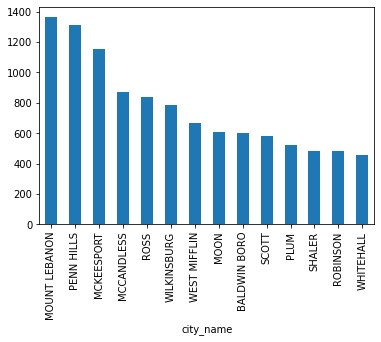

In [5]:
a = c.value_counts('city_name')
a.iloc[1:15].plot(kind = "bar")

**You may be wondering why I didn't include the first city in the list...**

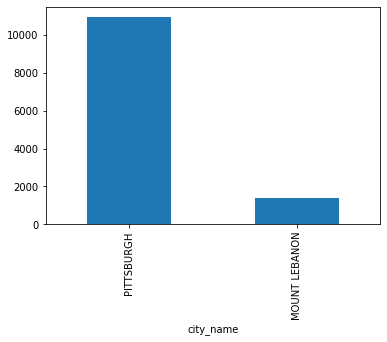

In [6]:
a.iloc[0:2].plot(kind = "bar")

**Sorting the calls part II**

In [10]:
f = a > 100
p = a[f]
p.rank()

city_name
PITTSBURGH        70.0
MOUNT LEBANON     69.0
PENN HILLS        68.0
MCKEESPORT        67.0
MCCANDLESS        66.0
                  ... 
BRACKENRIDGE       5.0
ETNA               4.0
BRADDOCK HILLS     3.0
OHIO               2.0
PORT VUE           1.0
Length: 70, dtype: float64

**Here is our least EMS call neighborhoods of this dataset!**

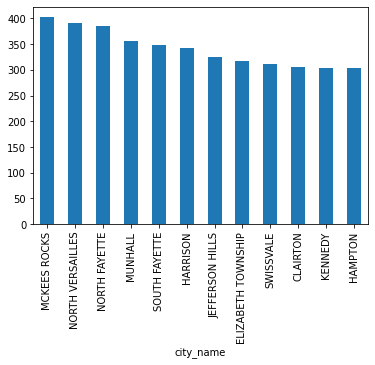

In [11]:
p.iloc[15:].plot(kind = "bar")

## Part 3: Crime Rate